# 1. Este notebook buscar relacionar dados referente `Experiência profissional prejudicada por interseccionalidade de gênero e cor/raça/etnia`.

## 1.1 Gerar uma lista com todas as colunas do dataFrame para melhor visualização.

In [26]:
import pandas as pd
from sqlalchemy import create_engine

caminho_banco = "../../sqlite/database/stateOfDataBR2023.db"
conn = create_engine(f'sqlite:///{caminho_banco}')

query = """
SELECT * FROM dados;
"""

df = pd.read_sql(query, conn)

for i, col in enumerate(df.columns):
    print(f'{i}: {col}')

0: (P0-_id)
1: (P1_a_-_Idade)
2: (P1_a_1_-_Faixa_idade)
3: (P1_b_-_Genero)
4: (P1_c_-_Cor/raca/etnia)
5: (P1_d_-_PCD)
6: (P1_e_-_experiencia_profissional_prejudicada)
7: (P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)
8: (P1_e_2_-_Experiencia_prejudicada_devido_a_minha_Cor_Raca_Etnia)
9: (P1_e_3_-_Experiencia_prejudicada_devido_a_minha_identidade_de_genero)
10: (P1_e_4_-_Experiencia_prejudicada_devido_ao_fato_de_ser_PCD)
11: (P1_f_-_aspectos_prejudicados)
12: (P1_f_1-_Quantidade_de_oportunidades_de_emprego/vagas_recebidas)
13: (P1_f_2-_Senioridade_das_vagas_recebidas_em_relacao_a_sua_experiencia)
14: (P1_f_3-_Aprovacao_em_processos_seletivos/entrevistas)
15: (P1_f_4-_Oportunidades_de_progressao_de_carreira)
16: (P1_f_5-_Velocidade_de_progressao_de_carreira)
17: (P1_f_6-_Nivel_de_cobranca_no_trabalho/Stress_no_trabalho)
18: (P1_f_7-_Atencao_dada_diante_das_minhas_opinioes_e_ideias)
19: (P1_f_8-_Relacao_com_outros_membros_da_empresa-_em_momentos_de_trabalho)
20: (

## 1.2 Removendo `'NaN'` e transformando valores em `'Int'`. 

In [30]:
interseccao_genero_cor_raca_etnia = df[['(P1_e_-_experiencia_profissional_prejudicada)',
                    '(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)',
                    '(P1_e_2_-_Experiencia_prejudicada_devido_a_minha_Cor_Raca_Etnia)',
                    '(P1_e_3_-_Experiencia_prejudicada_devido_a_minha_identidade_de_genero)'
                   ]].copy()

print(interseccao_genero_cor_raca_etnia.isnull().sum())
interseccao_genero_cor_raca_etnia.dropna(inplace=True)


# df_exploracao = df[['(P1_c_-_Cor/raca/etnia)']]
interseccao_genero_cor_raca_etnia = interseccao_genero_cor_raca_etnia[[
                    '(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)',
                    '(P1_e_2_-_Experiencia_prejudicada_devido_a_minha_Cor_Raca_Etnia)',
                    '(P1_e_3_-_Experiencia_prejudicada_devido_a_minha_identidade_de_genero)']].astype(int)

interseccao_genero_cor_raca_etnia = interseccao_genero_cor_raca_etnia.astype(bool)

interseccao_genero_cor_raca_etnia.head(10)



(P1_e_-_experiencia_profissional_prejudicada)                              2574
(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)    2574
(P1_e_2_-_Experiencia_prejudicada_devido_a_minha_Cor_Raca_Etnia)           2574
(P1_e_3_-_Experiencia_prejudicada_devido_a_minha_identidade_de_genero)     2574
dtype: int64


ValueError: invalid literal for int() with base 10: '0.0'

## 1.3 Removendo `'NaN'` e gerando novo dataFrame com `join` de colunas.

In [ ]:
df_genero_cor_raca_etnia = df[['(P1_b_-_Genero)', 
                               '(P1_c_-_Cor/raca/etnia)', 
                               '(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'
                              ]].copy()
# Unindo tabelas distintas após tratamento individual
df_join_combinado = df_genero_cor_raca_etnia.join(interseccao_genero_cor_raca_etnia)

# Verifica se há valore vazio <NaN>
# print(df_join_combinado.isnull().sum())
print(df_join_combinado.columns)

df_join_combinado.dropna(inplace=True)


df_join_combinado.head(10)

## 1.4 Este bloco aplica filtros que atendem aos critérios específicos, mantendo apenas as colunas de interesse. Depois agrupa por gênero e cor/raça/etnia, soma os totais e por fim cria uma nova coluna com os valores percentuais de cada gênero e cor/raça/etnia.

In [28]:
import sys
import os

sys.path.append(os.path.abspath('../../src'))

from utils.funcoes import calcular_valor_coluna


#   O código cria um novo DataFrame chamado 'consulta' que contém apenas as linhas que atendem aos critérios
#  de filtragem especificados, mantendo apenas as colunas de interesse.
# ------------------------------ C Ó D I G O  A T U A L ------------------------------
# df_consulta_filtrada = df_join_combinado[
#     (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Desempregado, buscando recolocacao')) &
#     (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Desempregado e nao estou buscando recolocacao')) &
#     (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Somente Estudante (graduacao)')) &
#     (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Prefiro nao informar'))
#     ][
#         ['(P1_b_-_Genero)',
#          '(P1_c_-_Cor/raca/etnia)',
#          '(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)'
#      ]]

# ------------------------------ C Ó D I G O  T E S T E ------------------------------
df_consulta_filtrada = df_join_combinado[
    (df_join_combinado['(P1_b_-_Genero)'].isin(['Feminino', 'Masculino', 'Outro'])) & 
    (df_join_combinado['(P1_c_-_Cor/raca/etnia)'].ne('Outra')) &
    (df_join_combinado['(P1_c_-_Cor/raca/etnia)'].ne('Prefiro nao informar')) &
    (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Desempregado, buscando recolocacao')) &
    (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Desempregado e nao estou buscando recolocacao')) &
    (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Somente Estudante (graduacao)')) &
    (df_join_combinado['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Prefiro nao informar'))
    ][
        ['(P1_b_-_Genero)',
         '(P1_c_-_Cor/raca/etnia)',
         '(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)'
     ]]
# display(df_consulta_filtrada)

# # Agrupando por nível e gênero e somando os totais
genero_cor_raca_etnia_por_experiencia_prejudicada = df_consulta_filtrada.groupby(
    ['(P1_b_-_Genero)', '(P1_c_-_Cor/raca/etnia)']
)['(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)'].value_counts().reset_index(name='valores_totais')
genero_cor_raca_etnia_por_experiencia_prejudicada.head(220)


# Calculando o total por nível
total_experiencia_profissional_afetada = genero_cor_raca_etnia_por_experiencia_prejudicada.groupby(['(P1_b_-_Genero)', 
                                                                                                    '(P1_c_-_Cor/raca/etnia)']
                                                                                                  )['valores_totais'].sum().reset_index()
total_experiencia_profissional_afetada.rename(columns={'valores_totais': 'total_experiencia_profissional_afetada'}, inplace=True)
# total_experiencia_profissional_afetada.head(100)


# Juntando os totais por nível com o DataFrame agrupado
merged = pd.merge(genero_cor_raca_etnia_por_experiencia_prejudicada, total_experiencia_profissional_afetada, on=['(P1_b_-_Genero)', '(P1_c_-_Cor/raca/etnia)'], how='outer')
# merged.head(37)


# Calculando a porcentagem
merged['valores_percentuais'] = (merged['valores_totais'] / merged['total_experiencia_profissional_afetada']) * 100
merged[['(P1_b_-_Genero)', '(P1_c_-_Cor/raca/etnia)',
        '(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)',
        'valores_totais', 'valores_percentuais']].head(37)



,(P1_b_-_Genero),(P1_c_-_Cor/raca/etnia),(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada),valores_totais,valores_percentuais
0,Feminino,Amarela,False,26,70.270270
1,Feminino,Amarela,True,11,29.729730
2,Feminino,Branca,False,475,64.625850
3,Feminino,Branca,True,260,35.374150
4,Feminino,Indigena,False,3,100.000000
5,Feminino,Parda,False,160,65.040650
6,Feminino,Parda,True,86,34.959350
7,Feminino,Preta,False,67,77.906977
8,Feminino,Preta,True,19,22.093023
9,Masculino,Amarela,True,78,84.782609


# 2. Gerando gráficos a partir dos dados

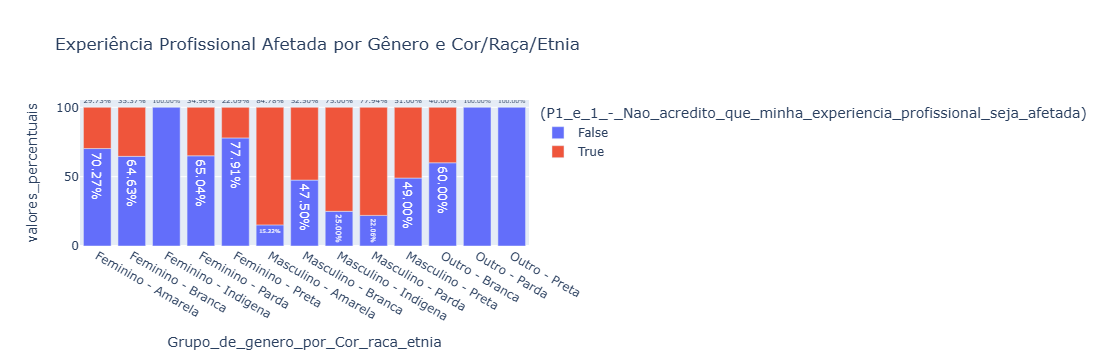

In [29]:
import pandas as pd
import plotly.express as px

# Criando a nova coluna combinada
merged['Grupo_de_genero_por_Cor_raca_etnia'] = merged['(P1_b_-_Genero)'] + ' - ' + merged['(P1_c_-_Cor/raca/etnia)']


# Agrupando os dados
grouped = merged.groupby(['Grupo_de_genero_por_Cor_raca_etnia', '(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)'])['valores_totais'].sum().reset_index()

# Calculando o total por grupo
totais = grouped.groupby('Grupo_de_genero_por_Cor_raca_etnia')['valores_totais'].sum().reset_index()
totais.rename(columns={'valores_totais': 'total'}, inplace=True)

# Unindo os totais com o DataFrame agrupado
grouped = grouped.merge(totais, on='Grupo_de_genero_por_Cor_raca_etnia')

# Calculando a porcentagem
grouped['valores_percentuais'] = (grouped['valores_totais'] / grouped['total']) * 100

# Criando o gráfico
grafico = px.bar(
    grouped, 
    x='Grupo_de_genero_por_Cor_raca_etnia', 
    y='valores_percentuais', 
    color='(P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)',  
    title='Experiência Profissional Afetada por Gênero e Cor/Raça/Etnia', 
    barmode='relative', 
    text='valores_percentuais'
)

# Adicionando rótulos de texto
grafico.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Mostrando o gráfico
grafico.show()

